# TP on computational complexity and profiling
v. 2023-02-06 - A. Gademer and T. Drumond

Part of the « MMMDE4IN08 Professional Programming (2022-2023) » teaching unit, module "Continuous learning of programming languages".

## Exercise : Profiling bubble sort in Python

### Implementing bubble sort

Based on the pseudo-code :
```c
REPEAT
| isSorted ← TRUE
|  FOR count FROM 0 TO size-2 DO
|  |  IF array[count] > array[count+1] THEN
|  |  | SWAP array[count] and array[count+1]
|  |  | isSorted ← FALSE
|  |  END IF
|  END FOR
UNTIL isSorted = FALSE
```
implement the buble sort algorithm in Python.

In [1]:
def bubbleSort(array):
    isSorted = False
    while isSorted == False :
        isSorted = True
        for count in range(len(array)-1) :
            if array[count] > array[count+1]:
                array[count], array[count+1] = array[count+1], array[count]
                isSorted = False

You can test your code here:

In [2]:
array = [6,4,9,12,1]

bubbleSort(array)
print(array)

[1, 4, 6, 9, 12]


### Counting operations by hand
How many operations were needed to do the sorting on this example ? 

Yes, you need to count it and calculate it by hand 😬

### Now using Python's profiler
We will use a Python profiler to make the same operation counting. We will use the package [pprofile](https://github.com/vpelletier/pprofile) (although other profilers exist):

In [3]:
# First we install the pprofile package and import the relevant modules
!pip install pprofile
import pprofile
import pstats

#### Calling profiler

In [4]:
import sys 

# we need to instantiate a Profile object
prof = pprofile.Profile()

# Then we use the object to call our function with its argument
prof.runcall(bubbleSort,[6,4,9,12,1])

# # There is a secontd way of calling this profiler 
# # We can use the object to open a "with" context
# # Any code within this context will be profiled
# with prof():
#     bubbleSort([6,4,9,12,1])

#### Printing profiler's output

Now we are going to print some **stats about the code execution**: how many times lines got executed, how much time was spent on each line, etc...
We could call `prof.printStats()`, but with that `pprofile` will print info about ALL code: not only our function, but all of python's internals that got called prior and after the call of our function. You can try calling it: you'll quickly see the output is too volumninous and cumbersome to process. 


In [5]:
# Uncoment to call, if you dare xD
prof.print_stats()

Total duration: 0.000135183s
File: /tmp/ipykernel_837/3286427606.py
File duration: 0.000112057s (82.89%)
Line #|      Hits|         Time| Time per hit|      %|Source code
------+----------+-------------+-------------+-------+-----------
     1|         1|  4.76837e-06|  4.76837e-06|  3.53%|def bubbleSort(array):
     2|         1|  1.19209e-05|  1.19209e-05|  8.82%|    isSorted = False
     3|         6|  6.19888e-06|  1.03315e-06|  4.59%|    while isSorted == False :
     4|         5|  4.52995e-06|  9.05991e-07|  3.35%|        isSorted = True
     5|        25|  2.64645e-05|  1.05858e-06| 19.58%|        for count in range(len(array)-1) :
     6|        20|  1.90735e-05|  9.53674e-07| 14.11%|            if array[count] > array[count+1]:
     7|         5|  2.95639e-05|  5.91278e-06| 21.87%|                array[count], array[count+1] = array[count+1], array[count]
     8|         5|  9.53674e-06|  1.90735e-06|  7.05%|                isSorted = False



That is why we are going to print **only stats pertinent to our `bubbleSort` call**, using `pprofile`'s `annotate()` method. 
This method takes two arguments: 
- first, a file onto which the output will be written (we'll point it to the sysstem's standard output, so info gets printed out to us).
- second, the name of the source code section about which it should print profiling stats. 

We can see the different source files which got included in the profiling by printing out the `set` yielded by `prof.getFilenameSet()`:

In [6]:
prof.getFilenameSet()

{'/tmp/ipykernel_837/3286427606.py'}

Because we are running our code in a **interactive python (ipython)**  notebook, the code we run here get's labeled as `<**ipython**-input-1-xxxxxxxxxxxx>`. This is the source on which we want to focus. 

The following code looks for an element in the set containing the word `"ipython"` and then gives it as an argument to `prof.annotate`:

In [7]:
# Show stats about the code execution
# NOTE: There are multiple ways of looking for an element in a set in python, 
# using a single line of code. I present you with two versions:
# (1) Use a list comprehension, then select the first element
src_name = [f for f in prof.getFilenameSet() if "ipy"in f][0]
# (2) Use the filter function together with a lambda function, then
# use next to get the first element in the output of filter
src_name = next(filter(lambda s: "ipy" in s, prof.getFilenameSet()))
# Did you know both of these syntaxes?

# Now we can call annotate
prof.annotate(sys.stdout, src_name)


Total duration: 0.000135183s
File: /tmp/ipykernel_837/3286427606.py
File duration: 0.000112057s (82.89%)
Line #|      Hits|         Time| Time per hit|      %|Source code
------+----------+-------------+-------------+-------+-----------
     1|         1|  4.76837e-06|  4.76837e-06|  3.53%|def bubbleSort(array):
     2|         1|  1.19209e-05|  1.19209e-05|  8.82%|    isSorted = False
     3|         6|  6.19888e-06|  1.03315e-06|  4.59%|    while isSorted == False :
     4|         5|  4.52995e-06|  9.05991e-07|  3.35%|        isSorted = True
     5|        25|  2.64645e-05|  1.05858e-06| 19.58%|        for count in range(len(array)-1) :
     6|        20|  1.90735e-05|  9.53674e-07| 14.11%|            if array[count] > array[count+1]:
     7|         5|  2.95639e-05|  5.91278e-06| 21.87%|                array[count], array[count+1] = array[count+1], array[count]
     8|         5|  9.53674e-06|  1.90735e-06|  7.05%|                isSorted = False


We'll also print the total number of operations, which is given by `getTotalHitCount`

In [8]:
# Here the first file corresponds to our ipython code
fileTiming = list(prof.file_dict.values())[0][0]
# on the object fileTiming we can call getTotalHitCount()
print("Total operation number : " + str(fileTiming.getTotalHitCount()))

Total operation number : 68


You can see that the total operation number is equivalent to summing over the `Hits` column (check it yourself):

In [9]:
# TODO check it yourself
print(1+1+6+5+25+20+5+5)

68


### Counting ops on larger arrays
The main advantage of using a profiler is that **we can easily count operations on much larger inputs**!

In [10]:
import numpy as np
from numpy.random import randint
# We create a list of 1000 random integers
# taken between min_int to max_int (considering a 64 bit int)
# Note : we use numpy's random instead of ptyhon's random because it is faster
# when creating large arrays
array = randint(-sys.maxsize-1,sys.maxsize, size=1000, dtype=np.int64).tolist()

# Calling the profiler and printing stats
prof = pprofile.Profile()
prof.runcall(bubbleSort, array)
prof.annotate(sys.stdout, src_name)
timingFile = list(prof.file_dict.values())[0][0]
print("Total operation number : " + str(timingFile.getTotalHitCount()))

Total duration: 2.00636s
File: /tmp/ipykernel_837/3286427606.py
File duration: 2.00631s (100.00%)
Line #|      Hits|         Time| Time per hit|      %|Source code
------+----------+-------------+-------------+-------+-----------
     1|         1|  7.39098e-06|  7.39098e-06|  0.00%|def bubbleSort(array):
     2|         1|  1.33514e-05|  1.33514e-05|  0.00%|    isSorted = False
     3|       957|  0.000823736|  8.60748e-07|  0.04%|    while isSorted == False :
     4|       956|   0.00100446|  1.05069e-06|  0.05%|        isSorted = True
     5|    956000|     0.760288|   7.9528e-07| 37.89%|        for count in range(len(array)-1) :
     6|    955044|     0.824494|  8.63305e-07| 41.09%|            if array[count] > array[count+1]:
     7|    246435|     0.222449|  9.02668e-07| 11.09%|                array[count], array[count+1] = array[count+1], array[count]
     8|    246435|     0.197226|  8.00316e-07|  9.83%|                isSorted = False
Total operation number : 2405829


### Automation: Building a complexity vs input size curve
Recall that when we compare the computational complexity of algorithms, we are interested in their asymptotical behavior. 

Thanks to the profiler, we can easily measure the number of operations necessary for increasing input sizes and compare this experimental curve to the expected asymptotical behavior.

The following loop is collecting points to build this curve. Take some time to understand it and complete the missing parts.

In [11]:
dataSize = 10
sizeList=[]
costList=[]
for i in range(8):
    # TODO Complete the code

    # TODO Double the input data size
    dataSize = dataSize * 2

    # Generate a random input array
    array=np.random.randint(-sys.maxsize-1,sys.maxsize,
                            size=dataSize, 
                            dtype=np.int64).tolist()

    # TODO call bubble sort on the array using the profiler
    prof = pprofile.Profile()
    prof.runcall(bubbleSort, array)

    # Get the numper of operations (total hit count)
    timingFile = list(prof.file_dict.values())[0][0]
    numOps = timingFile.getTotalHitCount()

    # Keep array size and computational cost on lists
    sizeList.append(dataSize)
    costList.append(numOps)


After running the preivous code cell, we have populated the following lists with points to build our curve:

In [12]:
print(sizeList)
print(costList)

[20, 40, 80, 160, 320, 640, 1280, 2560]
[936, 3280, 15374, 62311, 242704, 957571, 3974234, 15980505]


##### Plotting the curve
Now we can plot it using Python's library `matplotlib`:

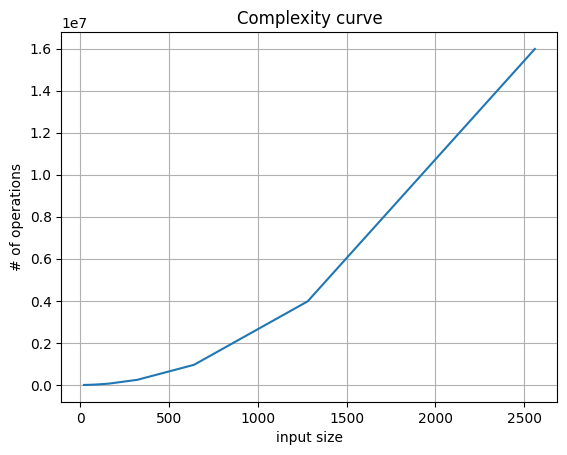

In [13]:
import matplotlib
import matplotlib.pyplot as plt

# Opening a figure and getting a plotting axes
fig, ax = plt.subplots()

# We want to plot 
# sizeList and costList from above
# sizeList will be our x-axis
# costList will be our y-axis
ax.plot(sizeList, costList)
# Including axis labels and grid
ax.set(xlabel='input size', ylabel='# of operations',
       title='Complexity curve')
ax.grid()
# Display plot
plt.show()


#### Comparing with Landau's complexity 
We'll redo the previous plot, this time including a curve of the Landau complexity for this algorithm -- which we have derived to be $O(\log(n^2))$.

**Extra**  Add a thrid curve to the plot corresponding to the predicted time cost mannually computed at the beggining of the exercise (i.e., $3n^2$).

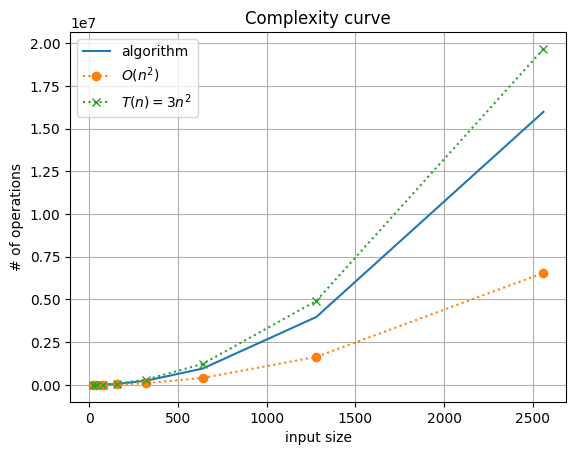

In [14]:
# Our x-axis is still sizeList
# Our new curve should have n² for each n in sizeList
# We can easily build this using a list comprehension
landau = [n**2 for n in sizeList]
comp = [3*n**2 for n in sizeList]
# Now we plot both curves
fig, ax = plt.subplots()
ax.plot(sizeList, costList, label="algorithm")
ax.plot(sizeList, landau, ":o", label="$O(n^2)$")
# TODO Add another curve with the expected time complexity of 3n²
ax.plot(sizeList, comp, ":x", label="$T(n)=3n^2$")

# Including legend, axis labels, grid
ax.legend()
ax.set(xlabel='input size', ylabel='# of operations',
       title='Complexity curve')
ax.grid()
# Display plot
plt.show()


## Exercise: comparing two sorting algorithms


### Quick sort implementation
In the following code, another sorting algorithm is implemented: the **quicksort**.

In [15]:
# This function takes last element as pivot, places
# the pivot element at its correct position in sorted
# array, and places all smaller (smaller than pivot)
# to left of pivot and all greater elements to right
# of pivot
def partition(arr, low, high):
    i = (low - 1)         # index of smaller element
    pivot = arr[high]     # pivot
    for j in range(low, high):
        # If current element is smaller than or equal to pivot
        if arr[j] <= pivot:
            # increment index of smaller element
            i = i+1
            # swap
            arr[i], arr[j] = arr[j], arr[i]
    # swap
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index

# Internal Quick sort recursive implementation


def quickSort_private(arr, low, high):
    if low < high:

        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)

        # Separately sort elements before
        # partition and after partition
        quickSort_private(arr, low, pi-1)
        quickSort_private(arr, pi+1, high)

# Quick sort function you should call


def quickSort(arr):
    quickSort_private(arr, 0, len(arr)-1)


#### Example usage

In [16]:
array = [7,8,6,2,5]
bubbleSort(array)
print(array)
array = [7,8,6,2,5]
quickSort(array)
print(array)

[2, 5, 6, 7, 8]
[2, 5, 6, 7, 8]


### Implement a profiling comparison of both sorting algorithms, with a nice graph showing both curves

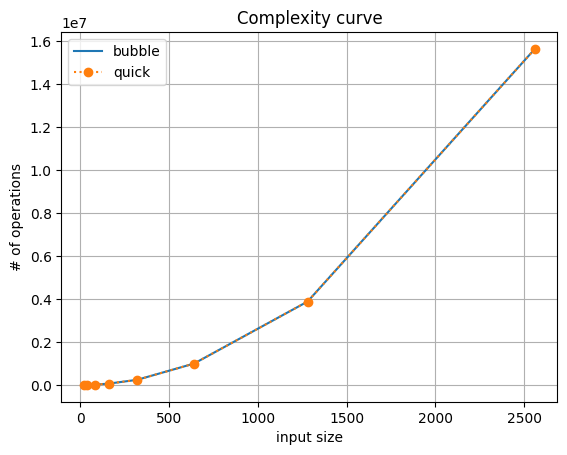

In [17]:
# It's up to you !
# TODO your code here
dataSize = 10
sizeList = []
costList = []
costListq = []
for i in range(8):
    dataSize = dataSize * 2
    array = np.random.randint(-sys.maxsize-1, sys.maxsize,size=dataSize,dtype=np.int64).tolist()
    prof = pprofile.Profile()
    prof.runcall(bubbleSort, array)
    timingFile = list(prof.file_dict.values())[0][0]
    numOps = timingFile.getTotalHitCount()
    sizeList.append(dataSize)
    costList.append(numOps)
    prof = pprofile.Profile()
    prof.runcall(quickSort,array)
    numOps = timingFile.getTotalHitCount()
    costListq.append(numOps)
fig, ax = plt.subplots()
ax.plot(sizeList, costList, label="bubble")
ax.plot(sizeList, costListq, ":o", label="quick")
ax.legend()
ax.set(xlabel='input size', ylabel='# of operations',title='Complexity curve')
ax.grid()
plt.show()

## Exercise: Comparing two algorithms on best case, worst case and average case
In this exercis you will run both sorting functions with the profiler, in order to collect points to plot three complexity curves:  
- Best case scenario complexity
- Worst case scenario complexity
- Average case scenario complexity

### Profilling bubble sort

For the profiling, you will proceed as follows:
1. Collect 8 points, starting from n=10 and doubling the size at each iteration.
1. For each input size:
    1. Profile a first call corresponding to the **best case scenario**: the array is **already sorted**.
    1. Profile a second call corresponding to the **worst case scenario**: the array is sorted in **descending order**.
    1. Repeat the profiling a number of times (say, 100) so that you can compute the **average cost** over random scenarios.

The code bellow partially implements this process. It is up to you to fill the missing parts (on the sections markd with a **`TODO`** tag).

In [18]:
dataRange = 10
dataSize = 10
sizeList = []
costListBestCaseBubble = []
costListWorstCaseBubble = []
costListAverageCaseBubble = []
prof = pprofile.Profile()

for i in range(8):
    # Double the input data size
    dataSize = dataSize * 2
    dataRange = dataSize
    sizeList.append(dataSize)

    # Generate a random input array with numbers between 0 and dataRange
    sys.setrecursionlimit(10**6)

    # TODO Profile a call representing the best case scenario
    best = list(range(0,dataSize))
    prof = pprofile.Profile()
    prof.runcall(bubbleSort,best)
    # Save the hit count in the BestCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListBestCaseBubble.append(timingFile.getTotalHitCount())

    # TODO Profile a call representing the worst case scenario
    worst = list(reversed(range(0,dataSize)))
    prof = pprofile.Profile()
    prof.runcall(bubbleSort,worst)
    # Save the hit cout in the WorstCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListWorstCaseBubble.append(timingFile.getTotalHitCount())

    # TODO Repeat the profiling for 100 different random arrays
    sumHits = 0
    for j in range(100):  # TODO complete the code
        # TODO complete the code
        # Note: The wanted element should also be picked at random
        array = np.random.randint(0, dataRange, size=dataSize).tolist()
        prof = pprofile.Profile()
        prof.runcall(bubbleSort,array)

        timingFile = list(prof.file_dict.values())[0][0]
        sumHits += timingFile.getTotalHitCount()

    # Take the average of 100 random samples then save to AverageCase list
    sumHits = sumHits/100
    costListAverageCaseBubble.append(sumHits)


This process should fill the following lists with 8 points, that you'll use to plot complexity curves later:

In [19]:
print(sizeList)
print(costListBestCaseBubble)
print(costListWorstCaseBubble)
print(costListAverageCaseBubble)

[20, 40, 80, 160, 320, 640, 1280, 2560]
[44, 84, 164, 324, 644, 1284, 2564, 5124]
[1203, 4803, 19203, 76803, 307203, 1228803, 4915203, 19660803]
[820.06, 3479.59, 14492.66, 59084.64, 241965.63, 990630.32, 3990832.49, 16084534.48]


### Profiling quick sort
You should repeat the previous process, this time for quick sort. Again, fill in the missing parts, marked with **`TODO`** tags.


In [20]:
dataRange = 10
dataSize = 10
sizeList=[]
costListBestCaseQuick=[]
costListWorstCaseQuick=[]
costListAverageCaseQuick=[]

for i in range(8):
    # Double the input data size
    dataSize = dataSize * 2
    sizeList.append(dataSize)
    dataRange = dataSize

    # Generate a random input array with numbers between 0 and dataRange


    # TODO Profile a call representing the best case scenario
    best = np.random.randint(0, dataRange, size=dataSize).tolist()
    prof = pprofile.Profile()
    prof.runcall(quickSort,best)
    # Save the hit count in the BestCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListBestCaseQuick.append(timingFile.getTotalHitCount())

    # TODO Profile a call representing the worst case scenario
    worst = list(reversed(range(0,dataSize)))
    prof = pprofile.Profile()
    prof.runcall(quickSort,worst)
    # Save the hit cout in the WorstCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListWorstCaseQuick.append(timingFile.getTotalHitCount())

    # TODO Repeat the profiling for 100 different random arrays
    sumHits = 0
    for j in range(100) : # TODO complete the code
        # TODO complete the code
        # Note: The wanted element should also be picked at random
        array=np.random.randint(0, dataRange, size=dataSize).tolist()
        prof = pprofile.Profile()
        prof.runcall(quickSort,array)
        timingFile = list(prof.file_dict.values())[0][0]
        sumHits += timingFile.getTotalHitCount()

    # Take the average of 100 random samples then save to AverageCase list
    costListAverageCaseQuick.append(sumHits/100)


This process should fill the following lists with 8 points, that you'll use to plot complexity curves later:

In [21]:
print(sizeList)
print(costListBestCaseQuick)
print(costListWorstCaseQuick)
print(costListAverageCaseQuick)

[20, 40, 80, 160, 320, 640, 1280, 2560]
[408, 1031, 2046, 5088, 12417, 24700, 58445, 119297]
[811, 2831, 10471, 40151, 157111, 621431, 2471671, 9858551]
[405.08, 950.82, 2185.75, 5041.4, 11338.35, 25558.78, 56155.84, 122549.89]


### Plotting the complexity curves

Now that you have collected all the points, plot together the curves for both algorithms, comparing them on each of the three scenarios.



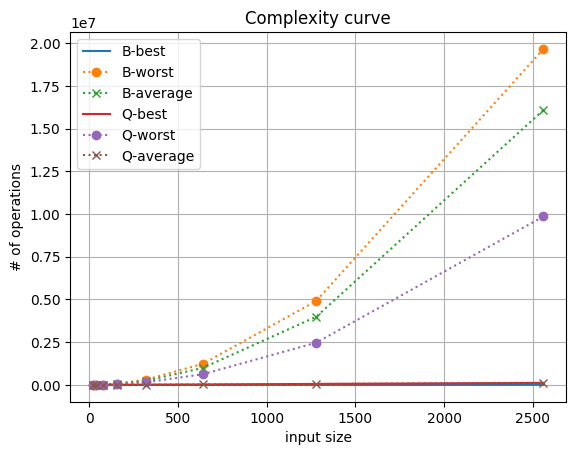

In [22]:
# TODO plot the curves here
fig, ax = plt.subplots()
ax.plot(sizeList, costListBestCaseBubble, label="B-best")
ax.plot(sizeList, costListWorstCaseBubble, ":o", label="B-worst")
ax.plot(sizeList, costListAverageCaseBubble, ":x", label="B-average")
ax.plot(sizeList, costListBestCaseQuick, label="Q-best")
ax.plot(sizeList, costListWorstCaseQuick, ":o", label="Q-worst")
ax.plot(sizeList, costListAverageCaseQuick, ":x", label="Q-average")
ax.legend()
ax.set(xlabel='input size', ylabel='# of operations',title='Complexity curve')
ax.grid()
plt.show()

#### Can you figure out from the curves the time complexity of each algorithm in best/worst/average case?
Remember the Landau complexity categories:

<table align="left"><tr><td><h5>Landau notation</h5></td><td><h5>Category name</h5></td></tr>
<tr><td>$O(1)$</td><td>constant</td></tr>
<tr><td>$O(log(n))$</td><td>
logarithmic</td></tr>
<tr><td>$O(n)$</td><td>
linear</td></tr>
<tr><td>$O(nlog(n))$</td><td>
nearly-linear (linearithmic)</td></tr>
<tr><td>$O(n^2)$</td><td> quadratic</td></tr>
<tr><td>$O(n^c)$</td><td> polynomial</td></tr>
<tr><td>$O(c^n)$</td><td> exponential</td></tr>
<tr><td>$O(n!)$</td><td> factorial</td></tr>
</table>

# Extra exercises

## Exercise: Linear Search of Index
In this exercise you will:
1. Implement linear search in an array
2. Run the code with the profiler and produce three complexity curves:
    - Best case scenario
    - Worst case scenario
    - Average case scenario



### Implementing linear search

If you need some help, check: https://en.wikipedia.org/wiki/Linear_search

In [23]:
# This function return the index of the searched value, -1 if the value is not there
def indexLinearSearch(input_array, searched_value):
  # TODO write the function code here
  for i in range(len(input_array)-1):
    if input_array[i] == searched_value:
      return i
  return -1

#### Test your code with the examples below : 

In [24]:
array = [7,8,6,2,5]
wanted = 6
print("The index of ", wanted, " in ", array, " is ", indexLinearSearch(array, wanted))
wanted = 10
print("The index of ", wanted, " in ", array, " is ", indexLinearSearch(array, wanted))

The index of  6  in  [7, 8, 6, 2, 5]  is  2
The index of  10  in  [7, 8, 6, 2, 5]  is  -1


### Profiling the time complexity of this code
For the profiling, you will proceed as follows:
1. Collect 8 points, starting from n=10 and doubling the size at each iteration.
1. For each input size:
    1. Profile a first call corresponding to the **best case scenario**: the wanted element is the **first** in the array.
    1. Profile a second call corresponding to the **worst case scenario**: the wanted element **is not present in** the array.
    1. Repeat the profiling a number of times (say, 100) so that you can compute the **average cost** over random scenarios.

In [25]:
dataRange = 10
dataSize = 10
sizeList = []
costListBestCase = []
costListWorstCase = []
costListAverageCase = []

for i in range(8):
    # Double the input data size
    dataSize = dataSize * 2
    sizeList.append(dataSize)
    dataRange = dataSize

    # Generate a random input array with numbers between 0 and dataRange

    # TODO Profile a call representing the best case scenario
    best = list(range(0, dataSize))
    prof = pprofile.Profile()
    prof.runcall(indexLinearSearch, best, 0)
    # Save the hit count in the BestCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListBestCase.append(timingFile.getTotalHitCount())

    # TODO Profile a call representing the worst case scenario
    worst = list(reversed(range(0, dataSize)))
    prof = pprofile.Profile()
    prof.runcall(indexLinearSearch, worst, -1)
    # Save the hit cout in the WorstCase list
    timingFile = list(prof.file_dict.values())[0][0]
    costListWorstCase.append(timingFile.getTotalHitCount())

    # TODO Repeat the profiling for 100 different random arrays
    sumHits = 0
    for j in range(100):  # TODO complete the code
        # TODO complete the code
        # Note: The wanted element should also be picked at random
        array = np.random.randint(0, dataRange, size=dataSize).tolist()
        prof = pprofile.Profile()
        prof.runcall(indexLinearSearch,array,5)
        timingFile = list(prof.file_dict.values())[0][0]
        sumHits += timingFile.getTotalHitCount()

    # Take the average of 100 random samples then save to AverageCase list
    costListAverageCase.append(sumHits/100)


Check the points you have collected for the complexity curves:

In [26]:
print(sizeList)
print(costListBestCase)
print(costListWorstCase)
print(costListAverageCase)

[20, 40, 80, 160, 320, 640, 1280, 2560]
[4, 4, 4, 4, 4, 4, 4, 4]
[41, 81, 161, 321, 641, 1281, 2561, 5121]
[29.9, 47.03, 102.57, 205.59, 389.82, 848.09, 1585.13, 3528.3]


#### Plotting the curve

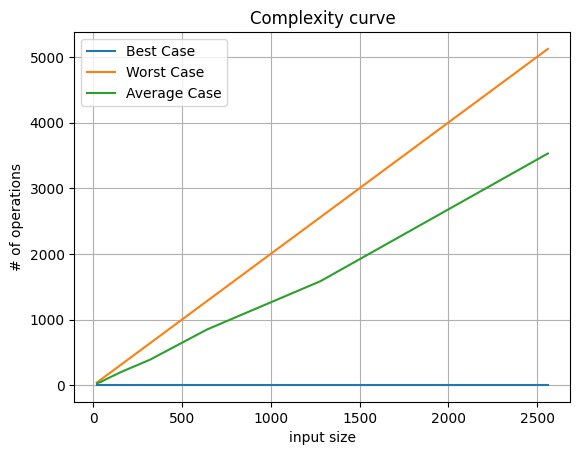

In [27]:
# Opening a figure and getting a plotting axes
fig, ax = plt.subplots()

# TODO plot here best case, worst case, and average case curves
ax.plot(sizeList, costListBestCase, label="Best Case")
ax.plot(sizeList, costListWorstCase,  label="Worst Case")
ax.plot(sizeList, costListAverageCase,  label="Average Case")
# setting up legend, axis label and fig title
ax.set(xlabel='input size', ylabel='# of operations',
       title='Complexity curve')
ax.grid()
ax.legend()
# Display plot
plt.show()


### <h3>Can you figure out the time complexity of this algorithm in the best/worst/average case ?</h3>

Remember the Landau complexity categories:

<table align="left"><tr><td><h5>Landau notation</h5></td><td><h5>Category name</h5></td></tr>
<tr><td>$O(1)$</td><td>constant</td></tr>
<tr><td>$O(log(n))$</td><td>
logarithmic</td></tr>
<tr><td>$O(n)$</td><td>
linear</td></tr>
<tr><td>$O(nlog(n))$</td><td>
nearly-linear (linearithmic)</td></tr>
<tr><td>$O(n^2)$</td><td> quadratic</td></tr>
<tr><td>$O(n^c)$</td><td> polynomial</td></tr>
<tr><td>$O(c^n)$</td><td> exponential</td></tr>
<tr><td>$O(n!)$</td><td> factorial</td></tr>
</table>

## Exercise: Binary Search of Index

Let's say that the data are sorted. How can we improve our algorithm ?
 - In regard of data ouside the array ?
 - In regard of the fact that the data is sorted ? => What happens if I know that the `search_value` < `array[m]` ?

Some of you may know it is more efficient in this case to use a **binary search** ( _recherche dicothomique en français_). You are going to implement it bellow. If you need help, check https://en.wikipedia.org/wiki/Binary_search_algorithm.

### Implementing binary search

In [28]:
# This function return the index of the searched value, -1 if the value is not there
def indexBinarySearch(input_array, searched_value):
    L = 0
    R = len(input_array)-1
    while L <= R:
        M = int(L+(R-L)/2)
        if input_array[M] == searched_value:
            return M
        elif input_array[M] < searched_value:
            L = M+1
        else:
            R = M-1
    # do something
    return -1


##### Test your code with the examples below : 

In [29]:
array = [7,8,6,2,5]
quickSort(array)
wanted = 6
print("The index of ", wanted, " in ", array, " is ", indexBinarySearch(array, wanted))
wanted = 10
print("The index of ", wanted, " in ", array, " is ", indexBinarySearch(array, wanted))
wanted = 7
print("The index of ", wanted, " in ", array, " is ", indexBinarySearch(array, wanted))
wanted = 5
print("The index of ", wanted, " in ", array, " is ", indexBinarySearch(array, wanted))

The index of  6  in  [2, 5, 6, 7, 8]  is  2
The index of  10  in  [2, 5, 6, 7, 8]  is  -1
The index of  7  in  [2, 5, 6, 7, 8]  is  3
The index of  5  in  [2, 5, 6, 7, 8]  is  1


### Profiling the time complexity of this code
Repeat here the same profiling you did for the linear search then plot curves from both algos together, so that you can compare them. 


In [30]:
# TODO your code here
dataRange = 10
dataSize = 10
sizeList = []
costListBestCaseB = []
costListWorstCaseB = []
costListAverageCaseB = []

for i in range(8):
    dataSize = dataSize * 2
    sizeList.append(dataSize)
    dataRange = dataSize
    best = list(range(0, dataSize))
    a = int(dataSize/2)
    prof = pprofile.Profile()
    prof.runcall(indexBinarySearch,best,a)
    timingFile = list(prof.file_dict.values())[0][0]
    costListBestCaseB.append(timingFile.getTotalHitCount())

    worst = list(reversed(range(0, dataSize)))
    prof = pprofile.Profile()
    prof.runcall(indexBinarySearch,worst,-1)
    timingFile = list(prof.file_dict.values())[0][0]
    costListWorstCaseB.append(timingFile.getTotalHitCount())


    sumHitsB = 0
    for j in range(100):
        array = np.random.randint(0, dataRange, size=dataSize).tolist()
        prof = pprofile.Profile()
        prof.runcall(indexBinarySearch,array,5)
        timingFile = list(prof.file_dict.values())[0][0]
        sumHitsB += timingFile.getTotalHitCount()

    costListAverageCaseB.append(sumHitsB/100)


#### Plotting the curve

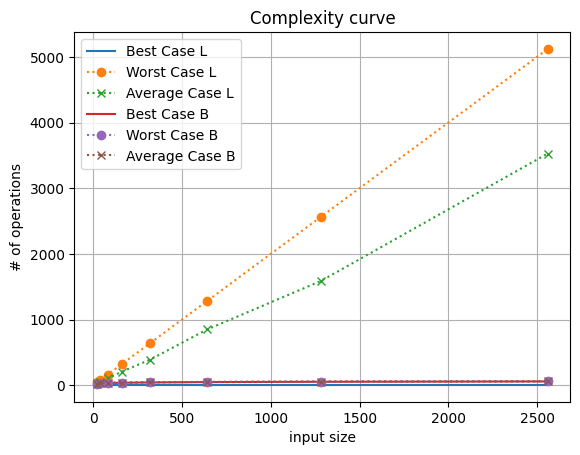

In [31]:
fig, ax = plt.subplots()

ax.plot(sizeList, costListBestCase, label="Best Case L")
ax.plot(sizeList, costListWorstCase, ":o",  label="Worst Case L")
ax.plot(sizeList, costListAverageCase, ":x",  label="Average Case L")
ax.plot(sizeList, costListBestCaseB, label="Best Case B")
ax.plot(sizeList, costListWorstCaseB, ":o",  label="Worst Case B")
ax.plot(sizeList, costListAverageCaseB, ":x",  label="Average Case B")

# setting up legend, axis label and fig title
ax.set(xlabel='input size', ylabel='# of operations',
       title='Complexity curve')
ax.grid()
ax.legend()
# Display plot
plt.show()


### <h3>Can you figure out the time complexity of this algorithm in the best/worst/average case ?</h3>

Remember the Landau complexity categories:

<table align="left"><tr><td><h5>Landau notation</h5></td><td><h5>Category name</h5></td></tr>
<tr><td>$O(1)$</td><td>constant</td></tr>
<tr><td>$O(log(n))$</td><td>
logarithmic</td></tr>
<tr><td>$O(n)$</td><td>
linear</td></tr>
<tr><td>$O(nlog(n))$</td><td>
nearly-linear (linearithmic)</td></tr>
<tr><td>$O(n^2)$</td><td> quadratic</td></tr>
<tr><td>$O(n^c)$</td><td> polynomial</td></tr>
<tr><td>$O(c^n)$</td><td> exponential</td></tr>
<tr><td>$O(n!)$</td><td> factorial</td></tr>
</table>

#### Question: is binary search faster than linear search on all cases?

#Webography
<a id="BIBLI_01">[1]</a> https://towardsdatascience.com/understanding-time-complexity-with-python-examples-2bda6e8158a7

<a id="BIBLI_02">[2]</a> https://realpython.com/python-sort/

<a id="BIBLI_03">[3]</a> https://www.geeksforgeeks.org/python-program-for-quicksort/

# To go further

What is algorithm behind the sorted function in Python ? : https://medium.com/ub-women-data-scholars/the-magic-behind-the-sort-algorithm-in-python-1cb9515294b5